In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_pickle('../../../data/processed/state0/right_ios_df.pkl')
print(df.shape)

(9603, 8)


In [3]:
df.columns

Index(['eventDurationSeconds', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'bearing_angular_change_per_second',
       'bearingAngleChange', 'gps_radius', 'aggressive'],
      dtype='object')

In [4]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

In [5]:
clusterer = hdbscan.HDBSCAN()

In [6]:
clusterer.fit(df)

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [7]:
clusterer.labels_

array([0, 0, 0, ..., 0, 0, 0], shape=(9603,))

In [8]:
clusterer.labels_.max()

np.int64(1)

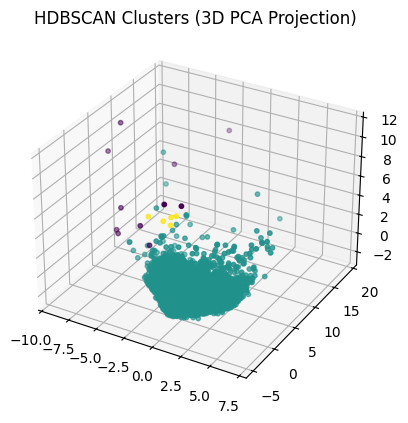

In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusterer.labels_, s=10)
plt.title("HDBSCAN Clusters (3D PCA Projection)")
plt.show()

In [10]:
df['cluster']   = clusterer.labels_
df.head()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,aggressive,cluster
5,3.971344,4.353902,11.944463,0.582875,17.291395,62.876380,21.924860,0,0
6,0.953109,8.050091,8.950999,2.994763,45.351456,90.525696,4.831457,0,0
27,0.960164,19.929909,22.358759,5.249106,33.677370,63.574265,17.025494,0,0
28,0.960177,14.650455,18.934900,6.188944,35.403570,98.347980,10.048761,0,0
39,4.946032,18.065144,31.188229,2.299849,15.639147,87.008430,36.850204,0,0


In [11]:
df.groupby('cluster').mean()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,aggressive
cluster,,,,,,,,
-1,3.379429,15.431960,14.672926,10.015592,96.270097,286.636099,7.159358,0.090909
0,3.113340,11.698041,14.068190,2.311053,24.614047,85.420744,20.306299,0.000626
1,7.026920,7.408710,16.089690,2.066900,11.875669,441.452702,8.959911,0.000000


cluster
-1    0.000000
 0    0.997883
 1    1.000000
Name: probability, dtype: float64


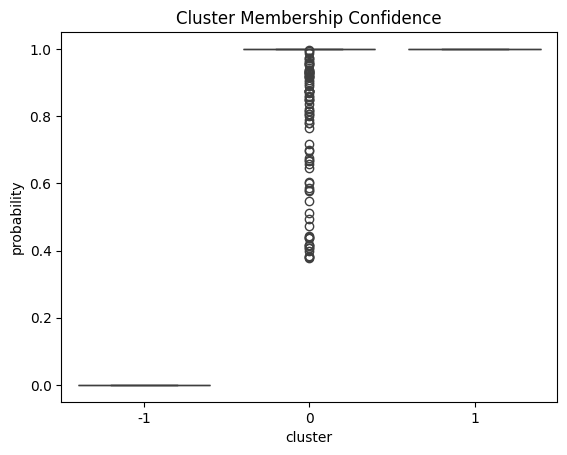

In [12]:
df['probability'] = clusterer.probabilities_
print(df.groupby('cluster')['probability'].mean())

sns.boxplot(x='cluster', y='probability', data=df)
plt.title("Cluster Membership Confidence")
plt.show()


In [13]:
df['cluster'].value_counts()

cluster
 0    9587
-1      11
 1       5
Name: count, dtype: int64

In [14]:
mask = clusterer.labels_ != -1
score = silhouette_score(X_scaled[mask], clusterer.labels_[mask])
print("Silhouette Score (excluding noise):", score)


Silhouette Score (excluding noise): 0.6585663898785739
